In [14]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

In [15]:
col_names = ['Date', 'Time', 'AreaAQueueSize', 'AreaBQueueSize', 'AreaCQueueSize', 'AreaDQueueSize','PeakTime', 'PreviousPriority', 'Priority']
# load dataset
data = pd.read_csv("Traffic_Data.csv", header=0, names=col_names)
data.head()

,Date,Time,AreaAQueueSize,AreaBQueueSize,AreaCQueueSize,AreaDQueueSize,PeakTime,PreviousPriority,Priority
0,17/01/2019,07:00:00,18,23,29,32,True,NaN,NaN
1,17/01/2019,07:01:00,39,49,62,0,True,NaN,D
2,17/01/2019,07:02:00,61,49,17,53,True,D,C
3,17/01/2019,07:03:00,36,75,17,53,True,C,A
4,17/01/2019,07:04:00,36,38,60,53,True,A,B


In [16]:
le = preprocessing.LabelEncoder()

X_2 = data.apply(le.fit_transform)

X_2.head()


,Date,Time,AreaAQueueSize,AreaBQueueSize,AreaCQueueSize,AreaDQueueSize,PeakTime,PreviousPriority,Priority
0,0,420,18,23,29,30,1,0,0
1,0,421,37,49,61,0,1,0,4
2,0,422,56,49,17,51,1,4,3
3,0,423,35,72,17,51,1,3,1
4,0,424,35,38,60,51,1,1,2


In [6]:
#split dataset in features and target variable
feature_cols = ['AreaAQueueSize','AreaBQueueSize','AreaCQueueSize', 'AreaDQueueSize', 'PeakTime', 'PreviousPriority']
X = X_2[feature_cols] # Features
y = data.Priority # Target variable

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.8607843137254902)


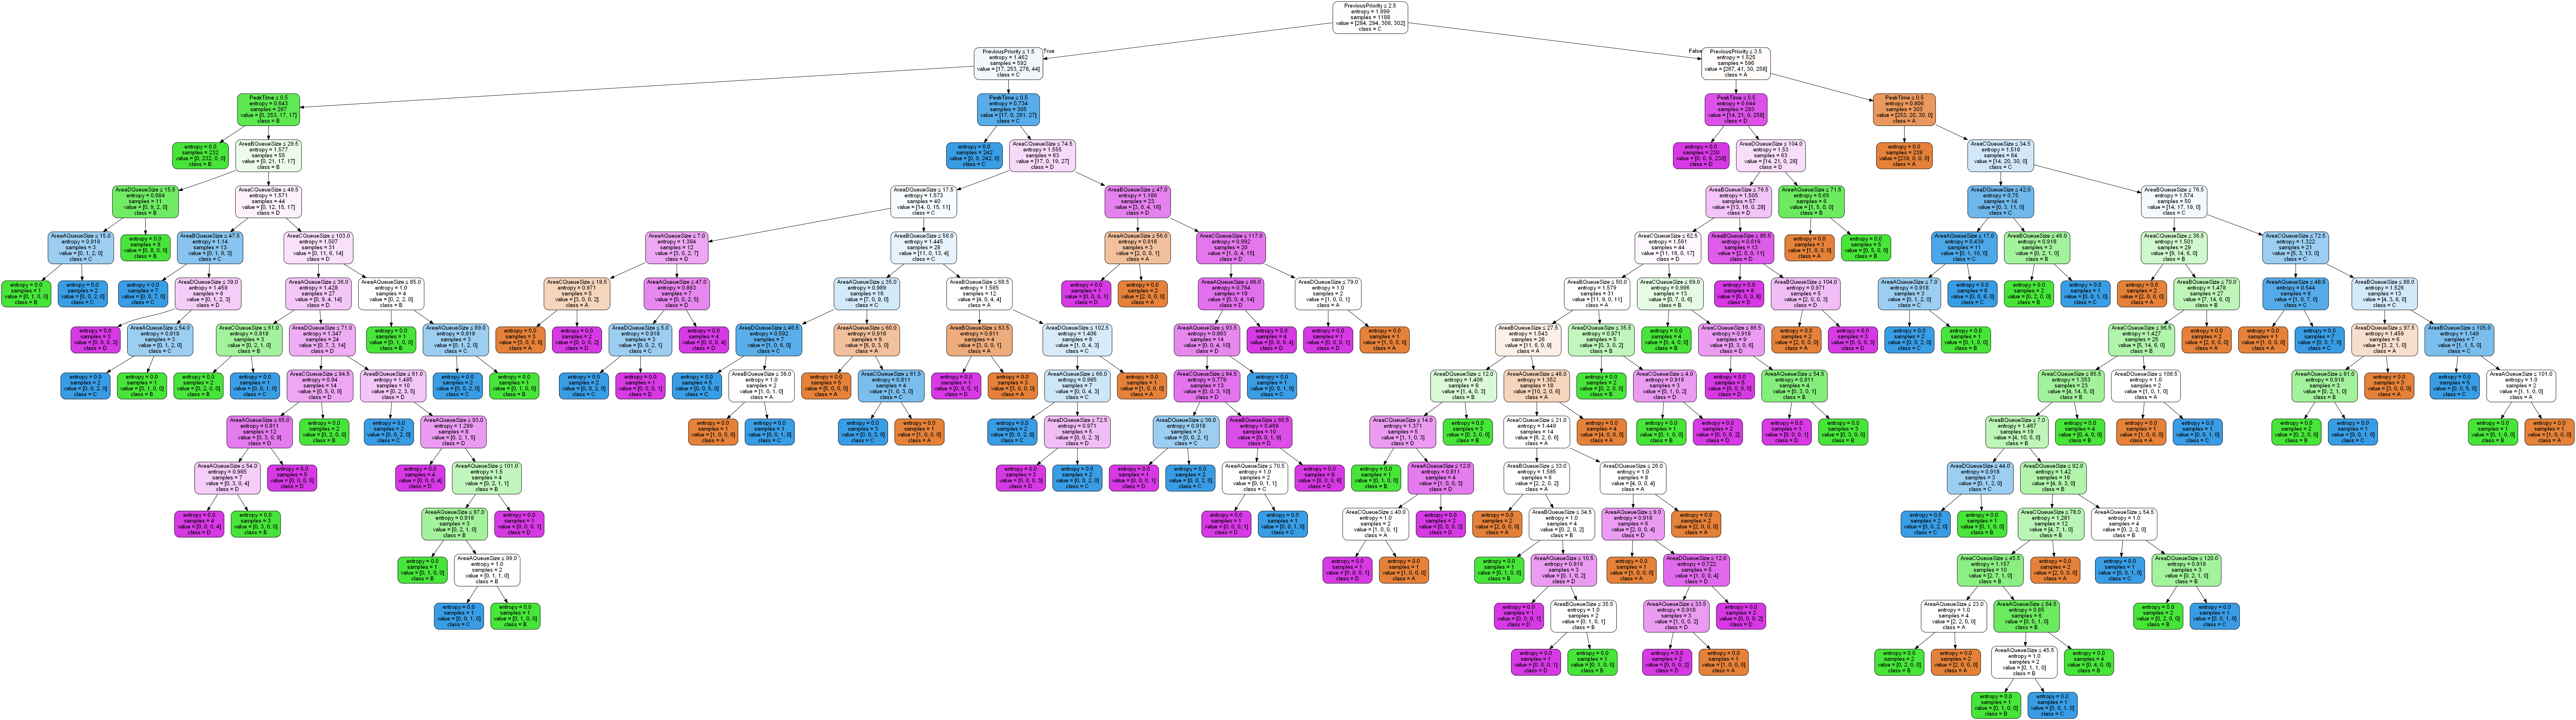

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['A','B','C','D'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('traffic.png')
Image(graph.create_png())